In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spi
%matplotlib inline

In [2]:
%run femshape/utils.py

In [3]:
fig8 = figure_of_eight(100)

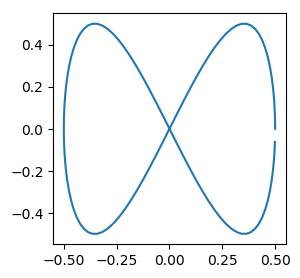

In [4]:
plt.plot(fig8[0], fig8[1])

Function to compute discrete velocities from a curve.

In [5]:
%run femshape/kernel.py

<Figure size 300x300 with 0 Axes>

# Grid Method

Setup a grid.

In [6]:
import numpy as np

In [7]:
grid_size = 16

In [8]:
x,y = np.meshgrid(np.linspace(-1,1,grid_size), np.linspace(-1,1,grid_size))

In [9]:
grid = np.array([x,y]).reshape(2,-1)

In [10]:
import support.kernels as kernel_factory

In [11]:
kernel = kernel_factory.factory('torch', .3)

In [12]:
get_velocities(fig8).shape

(2, 100)

The curve as a current is discretised as a sum of discrete masses with
coefficients equal to an approximation of tangent vector at that point.

At a point $P$ on the grid, we assign two one-forms, K(P)dx and K(P)dy, where
K is the kernel, and K(P) is thus a real valued function.


If the curve is discretised as
\\[
γ = \sum_{i} δ_{p_i} τ_i
\\]
then the invariant in direction $x$ at point $P$ on the grid is
\\[
(γ, δ_P dx) = \langle γ, K(P) \partial_x \rangle = \sum_i K(P,p_i) τ_i^x
\\]

In [13]:
grid.shape

(2, 256)

## Compute Features

In [14]:
point_features(fig8, grid, kernel).shape

(256, 2)

In [15]:
features_ = point_features(fig8, grid, kernel)

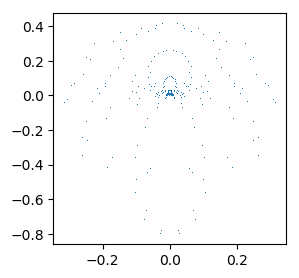

In [16]:
plt.plot(features_[:,0], features_[:,1], ',')

In [17]:
intensities = np.sum(np.square(features_), axis=1).reshape(grid_size, grid_size)

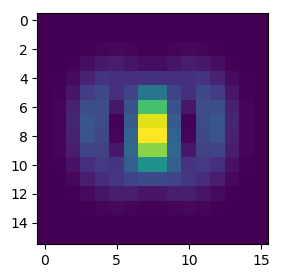

In [18]:
plt.imshow(intensities)

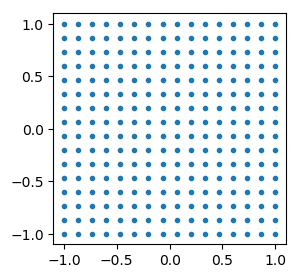

In [19]:
plt.plot(grid[0], grid[1], '.')

# Saving and fetching data

In [20]:
import scipy.io as spi
ncurves = 200
npoints = 500
x,y = randshapes(ncurves,npoints)
x[0], y[0] = figure_of_eight(npoints)
spi.savemat('currents_data_200_500.mat',{'x':x,'y':y})

In [21]:
def load_data(name, ncurves):
    data = spi.loadmat(name)
    x = data['x']
    y = data['y']
    x = x[:ncurves]
    y = y[:ncurves]
    return x, y

# Separate a figure of 8

In [22]:
xx, yy = load_data('currents_data_200_500.mat', 20)

In [23]:
xx.shape

(20, 500)

In [24]:
xx.shape

(20, 500)

In [25]:
def grid_pca_data(grid, xx, yy):
    pe = np.array([point_features(np.array([x,y]), grid, kernel) for x,y in zip(xx, yy)]).reshape(len(xx), -1)
    return pe

In [26]:
pe = grid_pca_data(grid, xx, yy)

In [27]:
pe.shape

(20, 512)

In [28]:
%run femshape/pca.py

<Figure size 300x300 with 0 Axes>

In [29]:
pca = PCA(pe, xx, yy)

(-1.3979524774654384,
 2.042787841415848,
 -1.7063919803694763,
 5.738918646593592)

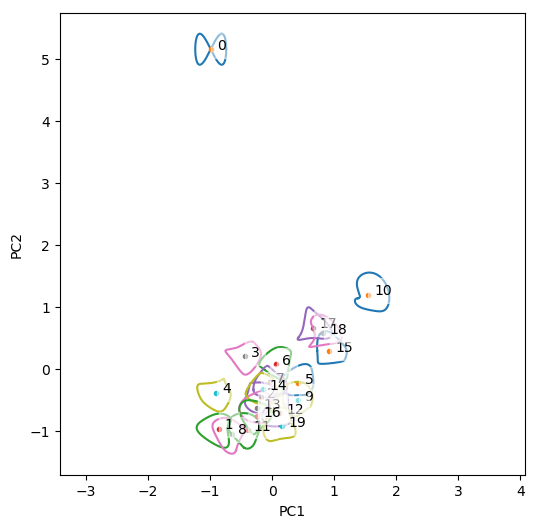

In [30]:
plt.figure(figsize=(6,6))
pca.plot(scaling=2, shift=(.1,0))
plt.axis('equal')

## Bigger data set

In [31]:
xx__, yy__ = load_data('currents_data_200_500.mat', 32)
xx_ = xx__[1:]
yy_ = yy__[1:]

In [32]:
pe_ = grid_pca_data(grid, xx_, yy_)

In [33]:
pca_ = PCA(pe_, xx_, yy_)

(-1.0282772687106079,
 1.3908229432619585,
 -2.4094097328085566,
 1.4853914138162334)

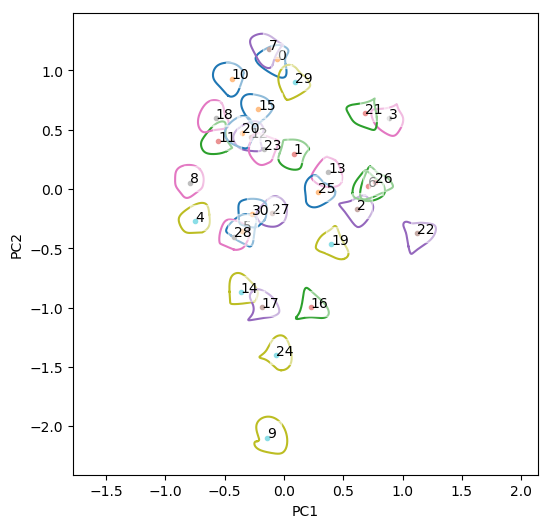

In [34]:
plt.figure(figsize=(6,6))
pca_.plot(scaling=4)
plt.axis('equal')